## PyTorch 中的電腦視覺庫

- torchvision:包含通常用於電腦視覺問題的數據集、模型架構和圖像轉換。
- torchvision.datasets:在這裡，您可以找到許多範例電腦視覺數據集，用於解決圖像分類、物件檢測、圖像字幕、視頻分類等一系列問題。它還包含一系列用於創建自定義數據集的基類。
- torchvision.models: 該模組包含用 PyTorch 實現的性能良好且常用的電腦視覺模型架構，您可以將這些架構用於您自己的問題。
- torchvision.transforms: 在與模型一起使用之前，需要對圖像進行轉換（轉換為數位/處理/增強），常見的圖像轉換可以在這裡找到。
- torch.utils.data.Dataset: PyTorch 的基數據集類。
- torch.utils.data.DataLoader: 在數據集上創建 Python 可反覆運算物件（使用 torch.utils.data.Dataset 建立）。


## 變數配置

In [1]:
# Import PyTorch
import torch
from torch import nn

# Import torchvision
import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor

# Import matplotlib for visualization
import matplotlib.pyplot as plt

# Check versions
# Note: your PyTorch version shouldn't be lower than 1.10.0 and torchvision version shouldn't be lower than 0.11
print(f"PyTorch version: {torch.__version__}\ntorchvision version: {torchvision.__version__}")

PyTorch version: 2.2.1+cu121
torchvision version: 0.17.1+cu121


In [36]:
import torch
class CFG:
  SEED = 42


device = "cuda" if torch.cuda.is_available() else "cpu"

## 獲取數據集


＄ 將從FashionMNIST開始。
＄ 原始的MNIST數據集包含數千個手寫數位示例（從0到9），並用於構建計算機視覺模型以識別郵政服務的數位。
＄ 而Zalando Research 製作的 FashionMNIST 也是類似的設置。它包含 10 種不同服裝的灰度圖像。

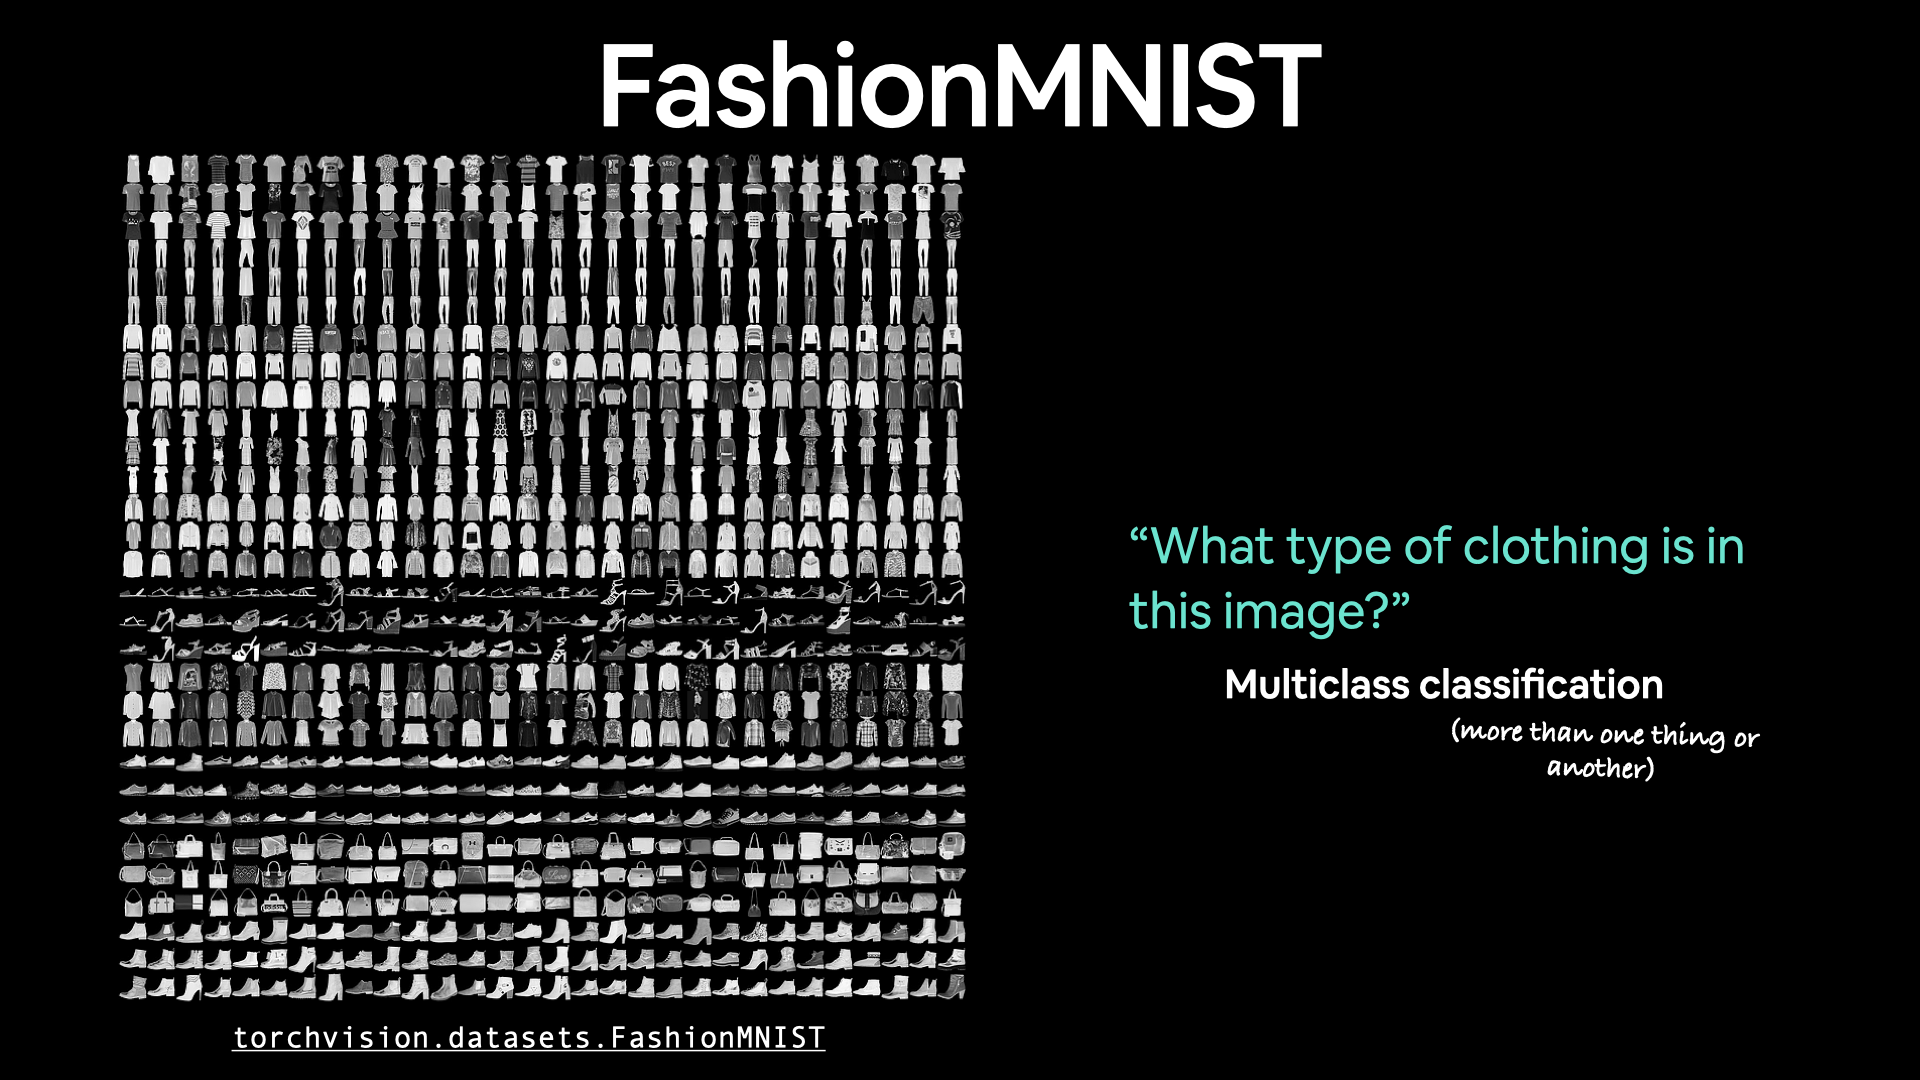

In [2]:
# 設定訓練數據
train_data = datasets.FashionMNIST(
    root="data",            # 下載數據的存儲路徑
    train=True,             # 要訓練還是測試分割？
    download=True,          # 如果數據不存在於磁盤上，是否需要下載
    transform=ToTensor(),   # 將圖像轉換為Torch張量，圖像原始格式為PIL
    target_transform=None   # 你也可以對標籤進行轉換
)

# 設定測試數據
test_data = datasets.FashionMNIST(
    root="data",
    train=False,            # 獲取測試數據
    download=True,
    transform=ToTensor()    # 將圖像轉換為Torch張量
)


100%|██████████| 26421880/26421880 [00:01<00:00, 16358336.18it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 305951.93it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:00<00:00, 5573996.36it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 4176455.90it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [8]:
# 查看資料
# image -> tensor
# label -> 標籤值

image, label = train_data[0]
# 張量外型
print(image.shape)
# 資料總筆數
len(train_data.data), len(train_data.targets), len(test_data.data), len(test_data.targets)

"""60,000 個訓練樣本和 10,000 個測試樣本。"""

torch.Size([1, 28, 28])


(60000, 60000, 10000, 10000)

＄ 如果 color_channels=3 ，則圖像以紅色、綠色和藍色的圖元值表示（也稱為 RGB 顏色模型）。

＄ 我們當前張量的順序通常被稱為 CHW （顏色通道、高度、寬度）。

＄ 關於圖像應該表示為 CHW （顏色通道在前）還是 HWC （顏色通道在後）存在爭議。PyTorch 通常接受 NCHW （通道優先）作為許多運算符的預設值。但是，PyTorch 也解釋說（ NHWC 通道最後）性能更好，被認為是最佳實踐。

In [11]:
# 輸出資料最後的分類
class_names = train_data.classes
# 分類數
print(len(class_names))
# 輸出所有分類
class_names

10


['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

Image shape: torch.Size([1, 28, 28])


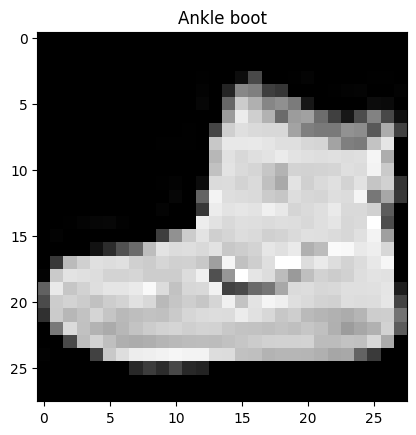

In [14]:
# 視覺化一筆資料

# plt.imshow他會自動給照片顏色，那其實我們這張照片，他的color channels 只有1，所以應該是一張灰階圖片
import matplotlib.pyplot as plt
image, label = train_data[0]
print(f"Image shape: {image.shape}")
plt.imshow(image.squeeze(), cmap="gray")
# plt.title(label);
plt.title(class_names[label]);


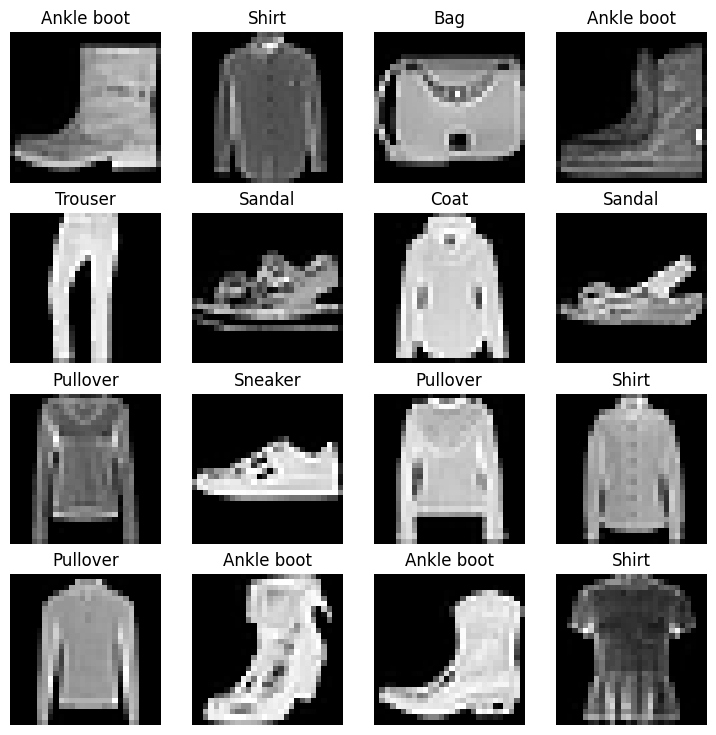

In [17]:
# 視覺化多筆資料

torch.manual_seed(CFG.SEED)
rows, cols = 4, 4 # 要輸出的圖片數

fig = plt.figure(figsize=(9, 9))

for i in range(1, rows * cols + 1):
    random_idx = torch.randint(0, len(train_data), size=[1]).item() # item() 轉整數
    img, label = train_data[random_idx]
    fig.add_subplot(rows, cols, i)
    plt.imshow(img.squeeze(), cmap="gray")
    plt.title(class_names[label])
    plt.axis(False);

## 準備 DataLoader

＄ 現在我們已經準備好了一個數據集。接下的動作是：分成批次 -> 裝進dataloader -> 放進模型訓練。

＄ 批次（batch）：它將一個大 Dataset 塊變成一個 Python 可反覆運算的小塊。計算效率更高。
這些較小的塊稱為批處理或小批量，可以通過 batch_size 參數進行設置。

＄ 在理想情況下，您可以同時對所有數據進行前向傳遞和向後傳遞。但是，一旦你開始使用非常大的數據集，除非你有無限的計算能力，否則將它們分解成批處理會更容易。對於小批量（數據的一小部分），每個週期更頻繁地執行梯度下降（每個小批量一次，而不是每個週期一次）。

＄ 適當的批量大小通常最常使用 2 的冪（例如 32、64、128、256、512）。那最推薦為32


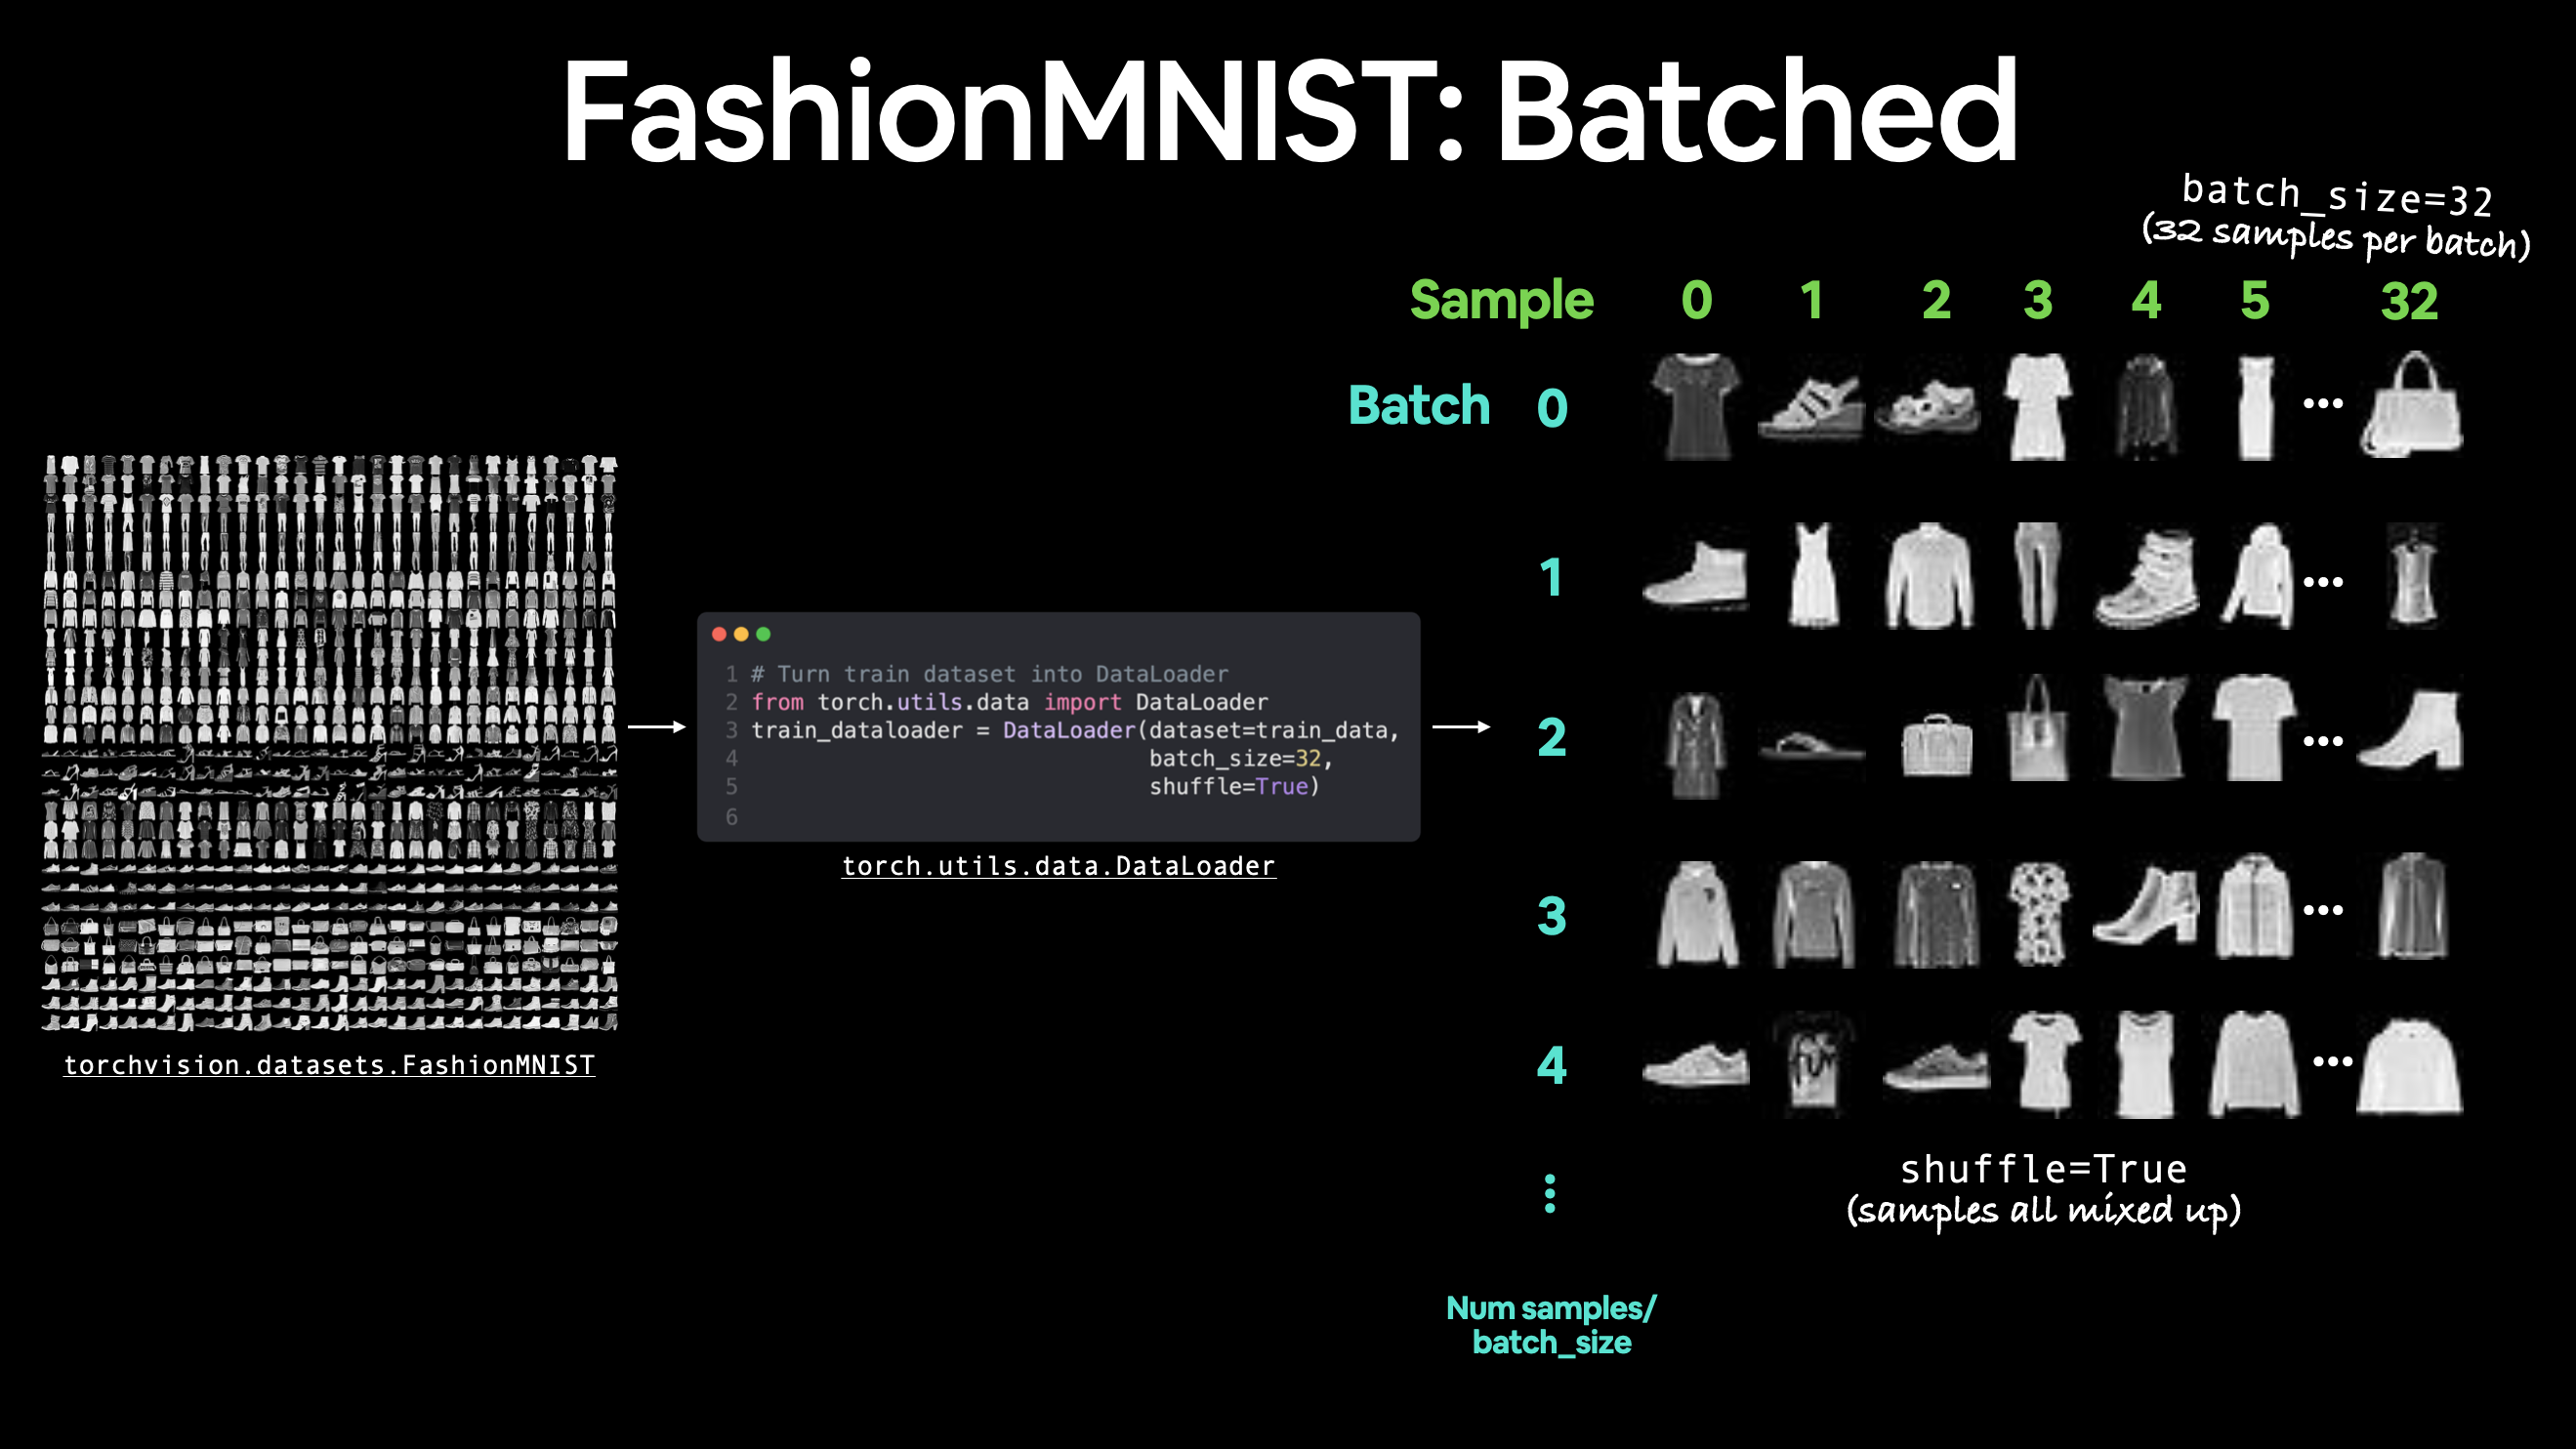

In [18]:
from torch.utils.data import DataLoader

# 批次大小
BATCH_SIZE = 32

# Turn datasets into iterables (batches)
train_dataloader = DataLoader(
    train_data, # dataset to turn into iterable
    batch_size=BATCH_SIZE,
    shuffle=True # 每個epoch是否對數據進行洗牌 -> 有助於訓練更乾淨
)

test_dataloader = DataLoader(test_data,
    batch_size=BATCH_SIZE,
    shuffle=False # 測試資料就不用洗了
)

print(f"Dataloaders: {train_dataloader, test_dataloader}")
print(f"Length of train dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}")
print(f"Length of test dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}")

Dataloaders: (<torch.utils.data.dataloader.DataLoader object at 0x7b2099c45630>, <torch.utils.data.dataloader.DataLoader object at 0x7b209a102590>)
Length of train dataloader: 1875 batches of 32
Length of test dataloader: 313 batches of 32


＄ 接下來檢查一樣樣本，確保說資料放進dataloader後，東西沒有被破壞。

In [20]:
# 拿一個資料批次起來
train_features_batch, train_labels_batch = next(iter(train_dataloader))
print(train_features_batch.shape, train_labels_batch.shape)

torch.Size([32, 1, 28, 28]) torch.Size([32])


Image size: torch.Size([1, 28, 28])
Label: 7, label size: torch.Size([])


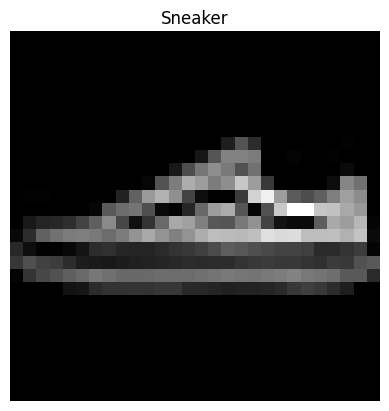

In [21]:
# 從批次資料中拿一筆資料出來視覺化

torch.manual_seed(CFG.SEED)
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis("Off");
print(f"Image size: {img.shape}")
print(f"Label: {label}, label size: {label.shape}")

# model_0 基線模型做圖片辨識

## 構建基線模型

＄ 基線模型：是您可以想像到的最簡單的模型之一。您使用基線作為起點，並嘗試使用後續更複雜的模型對其進行改進。


＄ 我們的基線將包括兩 nn.Linear() 層。而這就是nn.Flatten()

＄ nn.Flatten() 將張量的維度壓縮為單個向量。

In [24]:
# 創建一個展平層
flatten_model = nn.Flatten()  # 所有的nn模塊都作為一個模型（可以執行前向傳播）

# 獲取一個樣本，並放進Flatten
x = train_features_batch[0]
output = flatten_model(x)  # 執行前向傳播

# 打印發生的事情
print(f"展平前的形狀: {x.shape} -> [顏色通道, 高度, 寬度]")
print(f"展平後的形狀: {output.shape} -> [顏色通道, 高度*寬度]")


""" 那可以看到他把高度寬度相乘，三圍壓縮成二維。"""

展平前的形狀: torch.Size([1, 28, 28]) -> [顏色通道, 高度, 寬度]
展平後的形狀: torch.Size([1, 784]) -> [顏色通道, 高度*寬度]


In [25]:
# 宣告模型
from torch import nn
class FashionMNISTModelV0(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(), # 使用Flatten將資料壓縮成二為
            nn.Linear(in_features=input_shape, out_features=hidden_units),
            nn.Linear(in_features=hidden_units, out_features=output_shape)
        )

    def forward(self, x):
        return self.layer_stack(x)

torch.manual_seed(CFG.SEED)

# 初始化模型
model_0 = FashionMNISTModelV0(input_shape=784, #  every pixel (28x28)
    hidden_units=10, # 隱藏噌
    output_shape=len(class_names) # 輸出的分類
)

model_0.to("cpu") # keep model on CPU to begin with

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

## 設置損失、優化器和評估指標

＄ 評估指標的部分我們抓別人寫的來用。

In [29]:
import requests
from pathlib import Path

if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

helper_functions.py already exists, skipping download


In [30]:
from helper_functions import accuracy_fn  # 評估指標
loss_fn = nn.CrossEntropyLoss() # 損失函數
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.1) # 優化器

## 製作一個計時函數來測量我們的模型訓練花費的時間。

In [31]:
from timeit import default_timer as timer
def print_train_time(start: float, end: float, device: torch.device = None):
    """Prints difference between start and end time.

    Args:
        start (float): Start time of computation (preferred in timeit format).
        end (float): End time of computation.
        device ([type], optional): Device that compute is running on. Defaults to None.

    Returns:
        float: time between start and end in seconds (higher is longer).
    """
    total_time = end - start
    print(f"Train time on {device}: {total_time:.3f} seconds")
    return total_time

## 創建訓練迴圈並訓練批量數據模型

In [32]:
# 導入tqdm用於進度條顯示
from tqdm.auto import tqdm

torch.manual_seed(CFG.SEED)
train_time_start_on_cpu = timer()

# 設置epoch數（我們將其設置較小以加快訓練速度）
epochs = 3

for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n-------")
    ### 訓練
    train_loss = 0
    # 添加一個循環來遍歷訓練批次
    for batch, (X, y) in enumerate(train_dataloader):
        model_0.train()
        # 1. 前向傳播
        y_pred = model_0(X)
        # 2. 計算損失（每批次）
        loss = loss_fn(y_pred, y)
        train_loss += loss # 每個epoch的損失累加起來
        # 3. 梯度歸零
        optimizer.zero_grad()
        # 4. 損失反向傳播
        loss.backward()
        # 5. 更新參數
        optimizer.step()
        # 打印出已經看過多少樣本
        if batch % 400 == 0:
            print(f"已經處理了 {batch * len(X)}/{len(train_dataloader.dataset)} 樣本")

    # 將總訓練損失除以訓練數據加載器的長度（每批次平均損失）
    train_loss /= len(train_dataloader)

    ### 測試
    # 設置變量以累加損失和準確性
    test_loss, test_acc = 0, 0
    model_0.eval()
    with torch.inference_mode():
        for X, y in test_dataloader:
            # 1. 前向傳播
            test_pred = model_0(X)
            # 2. 計算損失（累加）
            test_loss += loss_fn(test_pred, y) # 每個epoch的損失累加起來
            # 3. 計算準確性（預測值需要與真實值相同）
            test_acc += accuracy_fn(y_true=y, y_pred=test_pred.argmax(dim=1))

        # 測試指標的計算需要在torch.inference_mode()中執行
        # 將總測試損失除以測試數據加載器的長度（每批次）
        test_loss /= len(test_dataloader)

        # 將總準確性除以測試數據加載器的長度（每批次）
        test_acc /= len(test_dataloader)

    ## 打印出發生的事情
    print(f"\n訓練損失: {train_loss:.5f} | 測試損失: {test_loss:.5f}, 測試準確率: {test_acc:.2f}%\n")

# 計算訓練時間
train_time_end_on_cpu = timer()
total_train_time_model_0 = print_train_time(start=train_time_start_on_cpu,
                                           end=train_time_end_on_cpu,
                                           device=str(next(model_0.parameters()).device))


  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
-------
已經處理了 0/60000 樣本
已經處理了 12800/60000 樣本
已經處理了 25600/60000 樣本
已經處理了 38400/60000 樣本
已經處理了 51200/60000 樣本

訓練損失: 0.59039 | 測試損失: 0.50954, 測試準確率: 82.04%

Epoch: 1
-------
已經處理了 0/60000 樣本
已經處理了 12800/60000 樣本
已經處理了 25600/60000 樣本
已經處理了 38400/60000 樣本
已經處理了 51200/60000 樣本

訓練損失: 0.47633 | 測試損失: 0.47989, 測試準確率: 83.20%

Epoch: 2
-------
已經處理了 0/60000 樣本
已經處理了 12800/60000 樣本
已經處理了 25600/60000 樣本
已經處理了 38400/60000 樣本
已經處理了 51200/60000 樣本

訓練損失: 0.45503 | 測試損失: 0.47664, 測試準確率: 83.43%

Train time on cpu: 34.336 seconds


## 進行預測並獲得模型 0 結果

In [34]:
def eval_model(model: torch.nn.Module, data_loader: torch.utils.data.DataLoader, loss_fn: torch.nn.Module, accuracy_fn):
    """返回一個包含模型在數據加載器上預測結果的字典。

    Args:
        model (torch.nn.Module): 能夠在數據加載器上進行預測的PyTorch模型。
        data_loader (torch.utils.data.DataLoader): 目標數據集用於進行預測。
        loss_fn (torch.nn.Module): 模型的損失函數。
        accuracy_fn: 一個準確性函數，用於比較模型的預測和真實標籤。

    Returns:
        (dict): 模型在數據加載器上進行預測的結果。
    """
    loss, acc = 0, 0
    model.eval()
    with torch.inference_mode():
        for X, y in data_loader:
            # 使用模型進行預測
            y_pred = model(X)

            # 累積每個批次的損失和準確率值
            loss += loss_fn(y_pred, y)
            acc += accuracy_fn(y_true=y,
                                y_pred=y_pred.argmax(dim=1)) # 對於準確率，需要預測標籤（logits -> pred_prob -> pred_labels）

        # 將損失和準確率縮放為每個批次的平均損失/準確率
        loss /= len(data_loader)
        acc /= len(data_loader)

    return {"model_name": model.__class__.__name__, # 這僅在使用類創建模型時有效
            "model_loss": loss.item(),
            "model_acc": acc}


In [35]:
torch.manual_seed(CFG.SEED)

model_0_results = eval_model(
    model=model_0,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn
)

model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

# model_1 非線性模型做圖片辨識



## 建構非線性模型
＄ 這次我們將非線性函數 （ nn.ReLU() ） 放在每個線性層之間。

In [37]:
# 宣告模型
class FashionMNISTModelV1(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=output_shape),
            nn.ReLU()
        )

    def forward(self, x: torch.Tensor):
        return self.layer_stack(x)

In [38]:
# 初始化模型
torch.manual_seed(CFG.SEED)
model_1 = FashionMNISTModelV1(input_shape=784,
    hidden_units=10,
    output_shape=len(class_names)
).to(device)
next(model_1.parameters()).device # check model device

device(type='cpu')

## 設置損失、優化器和評估指標

In [39]:
from helper_functions import accuracy_fn
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_1.parameters(), lr=0.1)

## 訓練和測試迴圈

＄ 這邊稍為做一個改良：將測試回圈及訓練回圈函數化。

In [40]:
# 訓練回圈
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device):
    train_loss, train_acc = 0, 0
    model.to(device)
    for batch, (X, y) in enumerate(data_loader):
        # 將數據發送到 GPU
        X, y = X.to(device), y.to(device)

        # 1. 正向傳播
        y_pred = model(X)

        # 2. 計算損失
        loss = loss_fn(y_pred, y)
        train_loss += loss
        train_acc += accuracy_fn(y_true=y,
                                 y_pred=y_pred.argmax(dim=1)) # 從 logits -> 預測標籤

        # 3. 梯度置零
        optimizer.zero_grad()

        # 4. 反向傳播
        loss.backward()

        # 5. 更新參數
        optimizer.step()

    # 計算每個 epoch 的損失和準確率並輸出訓練進度
    train_loss /= len(data_loader)
    train_acc /= len(data_loader)
    print(f"訓練損失: {train_loss:.5f} | 訓練準確率: {train_acc:.2f}%")

In [41]:
# 測試回圈
def test_step(data_loader: torch.utils.data.DataLoader,
              model: torch.nn.Module,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device = device):
    test_loss, test_acc = 0, 0
    model.to(device)
    model.eval() # 將模型設置為評估模式
    # 啟用推理上下文管理器
    with torch.inference_mode():
        for X, y in data_loader:
            # 將數據發送到 GPU
            X, y = X.to(device), y.to(device)

            # 1. 正向傳播
            test_pred = model(X)

            # 2. 計算損失和準確率
            test_loss += loss_fn(test_pred, y)
            test_acc += accuracy_fn(y_true=y,
                y_pred=test_pred.argmax(dim=1) # 從 logits -> 預測標籤
            )

        # 調整度量並輸出
        test_loss /= len(data_loader)
        test_acc /= len(data_loader)
        print(f"測試損失: {test_loss:.5f} | 測試準確率: {test_acc:.2f}%\n")

In [42]:
from timeit import default_timer as timer

torch.manual_seed(CFG.SEED)
train_time_start_on_gpu = timer() # 開始時間郵戳

epochs = 3
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n---------")
    train_step(data_loader=train_dataloader,
        model=model_1,
        loss_fn=loss_fn,
        optimizer=optimizer,
        accuracy_fn=accuracy_fn
    )
    test_step(data_loader=test_dataloader,
        model=model_1,
        loss_fn=loss_fn,
        accuracy_fn=accuracy_fn
    )

train_time_end_on_gpu = timer()
total_train_time_model_1 = print_train_time(start=train_time_start_on_gpu,
                                            end=train_time_end_on_gpu,
                                            device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
---------
訓練損失: 1.09199 | 訓練準確率: 61.34%
測試損失: 0.95636 | 測試準確率: 65.00%

Epoch: 1
---------
訓練損失: 0.78101 | 訓練準確率: 71.93%
測試損失: 0.72227 | 測試準確率: 73.91%

Epoch: 2
---------
訓練損失: 0.67027 | 訓練準確率: 75.94%
測試損失: 0.68500 | 測試準確率: 75.02%

Train time on cpu: 36.146 seconds



> 問題：「我使用了 GPU，但我的模型訓練速度不快，為什麼會這樣？

＄ 一個原因可能是因為你的數據集和模型都太小了（就像我們正在使用的數據集和模型一樣），使用 GPU 的好處被傳輸數據的實際時間所抵消。

＄ 將數據從 CPU 記憶體（預設）複製到 GPU 記憶體之間存在一個小瓶頸。因此，對於較小的模型和數據集，CPU 實際上可能是計算的最佳位置。

＄ 但對於更大的數據集和模型，GPU 可以提供的計算速度通常遠遠超過獲取數據的成本。但是，這在很大程度上取決於您使用的硬體。通過練習，您將習慣訓練模型的最佳位置。





## eval_model() 評估訓練 model_1 成效。

In [44]:
# 將值移至指定的裝置
torch.manual_seed(CFG.SEED)
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn,
               device: torch.device = device):
    """對給定的模型在給定的數據集上進行評估。

    Args:
        model (torch.nn.Module): 能夠對 data_loader 進行預測的 PyTorch 模型。
        data_loader (torch.utils.data.DataLoader): 要預測的目標數據集。
        loss_fn (torch.nn.Module): 模型的損失函數。
        accuracy_fn: 用於將模型的預測與真實標籤進行比較的準確度函數。
        device (str, optional): 計算目標的裝置。預設為 device。

    Returns:
        (dict): 模型對 data_loader 進行預測的結果。
    """
    loss, acc = 0, 0
    model.eval()
    with torch.inference_mode():
        for X, y in data_loader:
            # 將數據發送到指定裝置
            X, y = X.to(device), y.to(device)
            y_pred = model(X)
            loss += loss_fn(y_pred, y)
            acc += accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1))

        # 調整損失和準確率
        loss /= len(data_loader)
        acc /= len(data_loader)
    return {"model_name": model.__class__.__name__, # 只有當模型是通過類創建時才有效
            "model_loss": loss.item(),
            "model_acc": acc}

# 使用通用代碼計算模型 1 的結果
model_1_results = eval_model(model=model_1, data_loader=test_dataloader,
    loss_fn=loss_fn, accuracy_fn=accuracy_fn,
    device=device
)


{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.6850009560585022,
 'model_acc': 75.01996805111821}

In [46]:
# 評估model_0跟model_1
model_0_results, model_1_results

({'model_name': 'FashionMNISTModelV0',
  'model_loss': 0.47663894295692444,
  'model_acc': 83.42651757188499},
 {'model_name': 'FashionMNISTModelV1',
  'model_loss': 0.6850009560585022,
  'model_acc': 75.01996805111821})

# model_2 構建卷積神經網路 （CNN）

＄ 是時候創建一個捲積神經網路CNN(Convolutional Neural Network )了。

＄ 美國有線電視新聞網（CNN）以其在視覺數據中發現模式的能力而聞名。


＄ 我們將要使用的CNN模型在CNN Explainer 網站上被稱為 TinyVGG。它遵循卷積神經網路的典型結構：會經過捲幾層（Convolutional layer）->啟動層（activation layer）->池化層(pooling layer)


## CNN模型類型

＄結構化資料（Excel 電子表格、行和欄數據）：
- 模型參考：梯度提升模型（Gradient boosted models）、隨機森林（Random Forests）、XGBoost
- 程式碼範例：sklearn.ensemble, XGBoost library

＄ 非結構化資料（影像、音訊、語言）
- 模型參考：卷積神經網路（Convolutional Neural Networks），轉換器（Transformers）
- 程式碼範例：torchvision.models ， 變形金剛（HuggingFace）

＄ 現在讓我們構建一個CNN來複製CNN Explainer 網站上的模型。
[CNN Explainer website](https://poloclub.github.io/cnn-explainer/)

＄ 那名詞解釋會在下面寫

In [48]:
# 創建一個卷積神經網絡模型
class FashionMNISTModelV2(nn.Module):
    """從TinyVGG複製的模型架構：https://poloclub.github.io/cnn-explainer/"""
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        # 第一個卷積塊
        self.block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape,
                      out_channels=hidden_units,
                      kernel_size=3, # 用於卷積的方形核的大小
                      stride=1, # 默認值
                      padding=1), # 填充的選項，"valid"（無填充）或 "same"（輸出與輸入具有相同的形狀）或特定數字的 int
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,
                         stride=2) # 默認步長值與核大小相同
        )
        # 第二個卷積塊
        self.block_2 = nn.Sequential(
            nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
            nn.ReLU(),
            nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        # 分類器
        self.classifier = nn.Sequential(
            nn.Flatten(),
            # in_features 的形狀是從哪裡來的？
            # 這是因為我們網絡的每一層都會壓縮和改變輸入數據的形狀。
            nn.Linear(in_features=hidden_units*7*7,
                      out_features=output_shape)
        )

    def forward(self, x: torch.Tensor):
        x = self.block_1(x)
        x = self.block_2(x)
        x = self.classifier(x)
        return x


In [49]:
# 初始化模型
torch.manual_seed(CFG.SEED)
model_2 = FashionMNISTModelV2(
    input_shape=1,
    hidden_units=10,
    output_shape=len(class_names)).to(device)
model_2

FashionMNISTModelV2(
  (block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

## 單步執行 nn.Conv2d()

＄ nn.Conv2d() ，也稱為捲積層。

＄ nn.Conv2d() 中的「2d」代表2 維數據。例如，我們的圖像有兩個維度：高度和寬度。是的，有顏色通道尺寸，但每個顏色通道尺寸也有兩個維度：高度和寬度。

＄而對於其他維度資料（例如文字的 1D 或 3D 物件的 3D），還有 nn.Conv1d() 和 nn.Conv3d() 。

＄ 參數說明
- in_channels （int） - 輸入影像中的通道數。
- out_channels （int） - 捲積產生的通道數。
- kernel_size （int 或 tuple） - 卷積內核/濾波器的大小。
- stride （int 或 tuple，可選） - 卷積內核一次需要多大的步驟。預設值：1。
- padding （int， tuple， str） - 添加到輸入的所有四個邊的填充。預設值：0。

In [60]:
torch.manual_seed(CFG.SEED)

# 模擬创建一個样本：批次大小是 32，而每张图像的大小是 64x64 像素
images = torch.randn(size=(32, 3, 64, 64)) # [batch_size, color_channels, height, width]
test_image = images[0] # 取一個出來
print(f"Image batch shape: {images.shape} -> [batch_size, color_channels, height, width]")
print(f"Single image shape: {test_image.shape} -> [color_channels, height, width]")
print()

conv_layer = nn.Conv2d(in_channels=3,
                       out_channels=10,
                       kernel_size=3,
                       stride=1,
                       padding=0) # also try using "valid" or "same" here

# 比較經過捐機層的差異
print(test_image.unsqueeze(dim=0).shape)
print(conv_layer(test_image.unsqueeze(dim=0)).shape)


# 嘗試更改kernel_size
conv_layer_2 = nn.Conv2d(in_channels=3,
                         out_channels=10,
                         kernel_size=(5, 5), # kernel is usually a square so a tuple also works
                         stride=2,
                         padding=0)

print(conv_layer_2(test_image.unsqueeze(dim=0)).shape)
print()


# 也可以使用.weight.shape、.bias.shape去查看一開始設的值
print(f"conv_layer_2 weight shape: \n{conv_layer_2.weight.shape} -> [out_channels=10, in_channels=3, kernel_size=5, kernel_size=5]")
print(f"\nconv_layer_2 bias shape: \n{conv_layer_2.bias.shape} -> [out_channels=10]")


Image batch shape: torch.Size([32, 3, 64, 64]) -> [batch_size, color_channels, height, width]
Single image shape: torch.Size([3, 64, 64]) -> [color_channels, height, width]

torch.Size([1, 3, 64, 64])
torch.Size([1, 10, 62, 62])
torch.Size([1, 10, 30, 30])

conv_layer_2 weight shape: 
torch.Size([10, 3, 5, 5]) -> [out_channels=10, in_channels=3, kernel_size=5, kernel_size=5]

conv_layer_2 bias shape: 
torch.Size([10]) -> [out_channels=10]


## 單步執行 nn.MaxPool2d()

＄ nn.MaxPool2d() ，也稱為最大池化層

In [62]:
torch.manual_seed(CFG.SEED)

# 模擬创建一個样本：批次大小是 32，而每张图像的大小是 64x64 像素
images = torch.randn(size=(32, 3, 64, 64)) # [batch_size, color_channels, height, width]
test_image = images[0] # 取一個出來

# 打印原始图像形状，包括添加和不添加额外维度后的形状
print(f"测试图像原始形状: {test_image.shape}")
print(f"添加额外维度后的测试图像形状: {test_image.unsqueeze(dim=0).shape}")

# 创建一个示例的 nn.MaxPool2d() 层
max_pool_layer = nn.MaxPool2d(kernel_size=2)

# 通过卷积层处理数据
test_image_through_conv = conv_layer(test_image.unsqueeze(dim=0))
print(f"通过 conv_layer() 处理后的形状: {test_image_through_conv.shape}")

# 通过最大池化层处理数据
test_image_through_conv_and_max_pool = max_pool_layer(test_image_through_conv)
print(f"通过 conv_layer() 和 max_pool_layer() 处理后的形状: {test_image_through_conv_and_max_pool.shape}")


"""
這邊要注意nn.MaxPool2d() 圖層內外所發生情況的形狀變化。
nn.MaxPool2d()的參數kernel_size會影響輸出形狀的大小。
在我們的例子中，形狀從 62x62 圖像到 31x31 圖像減半。
"""

测试图像原始形状: torch.Size([3, 64, 64])
添加额外维度后的测试图像形状: torch.Size([1, 3, 64, 64])
通过 conv_layer() 处理后的形状: torch.Size([1, 10, 62, 62])
通过 conv_layer() 和 max_pool_layer() 处理后的形状: torch.Size([1, 10, 31, 31])


'\n這邊要注意nn.MaxPool2d() 圖層內外所發生情況的形狀變化。\nnn.MaxPool2d()的參數kernel_size會影響輸出形狀的大小。\n在我們的例子中，形狀從 62x62 圖像到 31x31 圖像減半。\n'

In [65]:
# 讓我們看看這個工作與較小的張量。
torch.manual_seed(CFG.SEED)

# Create a random tensor with a similiar number of dimensions to our images
random_tensor = torch.randn(size=(1, 1, 2, 2))
print(f"Random tensor:\n{random_tensor}")
print(f"Random tensor shape: {random_tensor.shape}")
print()

# Create a max pool layer
max_pool_layer = nn.MaxPool2d(kernel_size=2) # kernel_size影響輸出型
max_pool_tensor = max_pool_layer(random_tensor)

print(f"\nMax pool tensor:\n{max_pool_tensor} <- 他會抓出原本random_tensor四格中的最大值")
print(f"Max pool tensor shape: {max_pool_tensor.shape}")

"""這就是使用 nn.MaxPool2d() 層的想法：從張量的一部分中獲取最大值，而忽略其餘部分。"""

Random tensor:
tensor([[[[0.3367, 0.1288],
          [0.2345, 0.2303]]]])
Random tensor shape: torch.Size([1, 1, 2, 2])


Max pool tensor:
tensor([[[[0.3367]]]]) <- 他會抓出原本random_tensor四格中的最大值
Max pool tensor shape: torch.Size([1, 1, 1, 1])


'這就是使用 nn.MaxPool2d() 層的想法：從張量的一部分中獲取最大值，而忽略其餘部分。'

## 設置損失函數和優化器

In [66]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_2.parameters(), lr=0.1)

## 訓練模型

In [67]:
torch.manual_seed(CFG.SEED)


from timeit import default_timer as timer
train_time_start_model_2 = timer()


epochs = 3
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n---------")
    train_step(data_loader=train_dataloader,
        model=model_2,
        loss_fn=loss_fn,
        optimizer=optimizer,
        accuracy_fn=accuracy_fn,
        device=device
    )
    test_step(data_loader=test_dataloader,
        model=model_2,
        loss_fn=loss_fn,
        accuracy_fn=accuracy_fn,
        device=device
    )

train_time_end_model_2 = timer()
total_train_time_model_2 = print_train_time(start=train_time_start_model_2,
                                           end=train_time_end_model_2,
                                           device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
---------
訓練損失: 0.59518 | 訓練準確率: 78.38%
測試損失: 0.39500 | 測試準確率: 85.99%

Epoch: 1
---------
訓練損失: 0.36536 | 訓練準確率: 86.90%
測試損失: 0.35244 | 測試準確率: 86.91%

Epoch: 2
---------
訓練損失: 0.32588 | 訓練準確率: 88.13%
測試損失: 0.32719 | 測試準確率: 88.07%

Train time on cpu: 207.002 seconds


## 評估模型

In [68]:
model_2_results = eval_model(
    model=model_2,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn
)

model_0_results, model_1_results, model_2_results

({'model_name': 'FashionMNISTModelV0',
  'model_loss': 0.47663894295692444,
  'model_acc': 83.42651757188499},
 {'model_name': 'FashionMNISTModelV1',
  'model_loss': 0.6850009560585022,
  'model_acc': 75.01996805111821},
 {'model_name': 'FashionMNISTModelV2',
  'model_loss': 0.32718968391418457,
  'model_acc': 88.06908945686901})

In [69]:
# 也可以用圖表顯示

import pandas as pd
compare_results = pd.DataFrame([model_0_results, model_1_results, model_2_results])
compare_results

,model_name,model_loss,model_acc
0,FashionMNISTModelV0,0.476639,83.426518
1,FashionMNISTModelV1,0.685001,75.019968
2,FashionMNISTModelV2,0.327190,88.069089


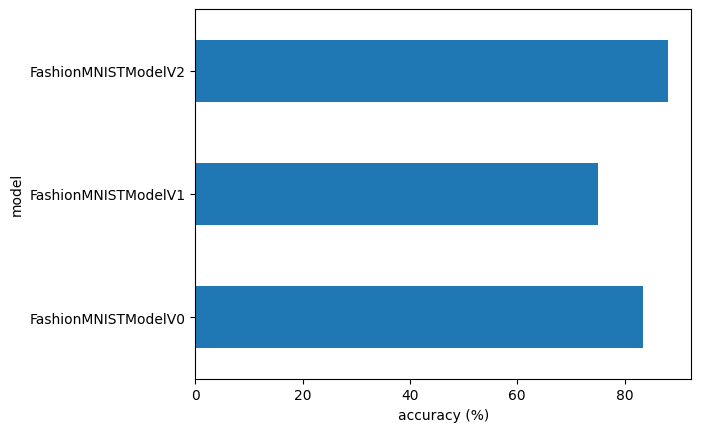

In [70]:
# Visualize our model results
compare_results.set_index("model_name")["model_acc"].plot(kind="barh")
plt.xlabel("accuracy (%)")
plt.ylabel("model");

## 使用最佳模型進行和評估隨機預測

In [71]:
# 定義做預測值的函數
def make_predictions(model: torch.nn.Module, data: list, device: torch.device = device):
    pred_probs = []
    model.eval()
    with torch.inference_mode():
        for sample in data:
            # Prepare sample
            sample = torch.unsqueeze(sample, dim=0).to(device) # Add an extra dimension and send sample to device
            # Forward pass (model outputs raw logit)
            pred_logit = model(sample)
            # Get prediction probability (logit -> prediction probability)
            pred_prob = torch.softmax(pred_logit.squeeze(), dim=0) # note: perform softmax on the "logits" dimension, not "batch" dimension (in this case we have a batch size of 1, so can perform on dim=0)
            # Get pred_prob off GPU for further calculations
            pred_probs.append(pred_prob.cpu())

    # Stack the pred_probs to turn list into a tensor
    return torch.stack(pred_probs)

In [76]:
# 將預測值及訓練答案對比對
import random
random.seed(CFG.SEED)
test_samples = []
test_labels = []

for sample, label in random.sample(list(test_data), k=9):
    test_samples.append(sample)
    test_labels.append(label)

# View the first test sample shape and label
print(f"Test sample image shape: {test_samples[0].shape}\nTest sample label: {test_labels[0]} ({class_names[test_labels[0]]})")


# 使用model_2做預測值
pred_probs= make_predictions(model=model_2, data=test_samples)
# 預測出來的值，透過argmax做出預測標籤
pred_classes = pred_probs.argmax(dim=1)

test_labels, pred_classes

Test sample image shape: torch.Size([1, 28, 28])
Test sample label: 5 (Sandal)


([5, 1, 7, 4, 3, 0, 4, 7, 1], tensor([5, 1, 7, 4, 3, 0, 4, 7, 1]))

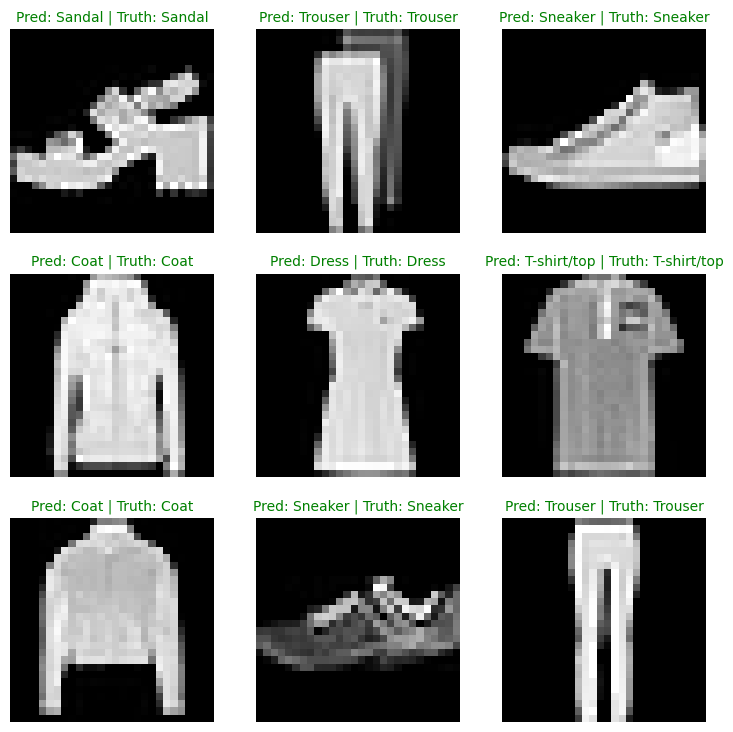

In [77]:
# 將預測值及訓練答案可視化

plt.figure(figsize=(9, 9))
nrows = 3
ncols = 3
for i, sample in enumerate(test_samples):
  # Create a subplot
  plt.subplot(nrows, ncols, i+1)

  # Plot the target image
  plt.imshow(sample.squeeze(), cmap="gray")

  # Find the prediction label (in text form, e.g. "Sandal")
  pred_label = class_names[pred_classes[i]]

  # Get the truth label (in text form, e.g. "T-shirt")
  truth_label = class_names[test_labels[i]]

  # Create the title text of the plot
  title_text = f"Pred: {pred_label} | Truth: {truth_label}"

  # Check for equality and change title colour accordingly
  if pred_label == truth_label:
      plt.title(title_text, fontsize=10, c="g") # green text if correct
  else:
      plt.title(title_text, fontsize=10, c="r") # red text if wrong
  plt.axis(False);

## 製作混淆矩陣以進行進一步的預測評估

＄ 對於分類問題，我們可以使用許多不同的評估指標。其中最直觀的是混淆矩陣（confusion matrix）。

＄ 混淆矩陣顯示分類模型在捕食者和真實標籤之間混淆的位置。

＄ 製作一個混淆矩陣，我們將經歷三個步驟：
- 使用我們訓練好的模型進行預測
- 使用 torchmetrics.ConfusionMatrix 創建一個混淆矩陣。
- 使用 mlxtend.plotting.plot_confusion_matrix() 繪製混淆矩陣。




In [79]:
# 从 tqdm 中导入进度条显示模块
from tqdm.auto import tqdm

# 1. 使用训练好的模型进行预测
y_preds = []  # 存储预测结果的列表
model_2.eval()  # 将模型设置为评估模式
with torch.inference_mode():  # 开启推断模式以减少内存占用
    for X, y in tqdm(test_dataloader, desc="Making predictions"):  # 使用 tqdm 显示预测进度
        # 将数据和标签发送到目标设备
        X, y = X.to(device), y.to(device)
        # 进行前向传播
        y_logit = model_2(X)
        # 将预测从 logits -> 预测概率 -> 预测标签
        y_pred = torch.softmax(y_logit, dim=1).argmax(dim=1)  # 注意：在这里，我们在“logits”维度上执行 softmax，而不是“batch”维度（在本例中，我们的批量大小为 32，所以可以在 dim=1 上执行 softmax）
        # 将预测放在 CPU 上进行评估
        y_preds.append(y_pred.cpu())
# 将预测结果列表连接成一个张量
y_pred_tensor = torch.cat(y_preds)


Making predictions:   0%|          | 0/313 [00:00<?, ?it/s]

In [80]:
# 安裝torchmetrics, mlxtend
# 注意：如果您使用的是Google Colab， mlxtend 則預設安裝版本為0.14.0（截至2022年3月），
# 但是，對於我們想要使用 plot_confusion_matrix() 的功能參數，我們需要0.19.0或更高版本。
try:
    import torchmetrics, mlxtend
    print(f"mlxtend version: {mlxtend.__version__}")
    assert int(mlxtend.__version__.split(".")[1]) >= 19, "mlxtend verison should be 0.19.0 or higher"
except:
    !pip install -q torchmetrics -U mlxtend
    import torchmetrics, mlxtend
    print(f"mlxtend version: {mlxtend.__version__}")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 841.5/841.5 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 12.1 MB/s eta 0:00:00
mlxtend version: 0.23.1


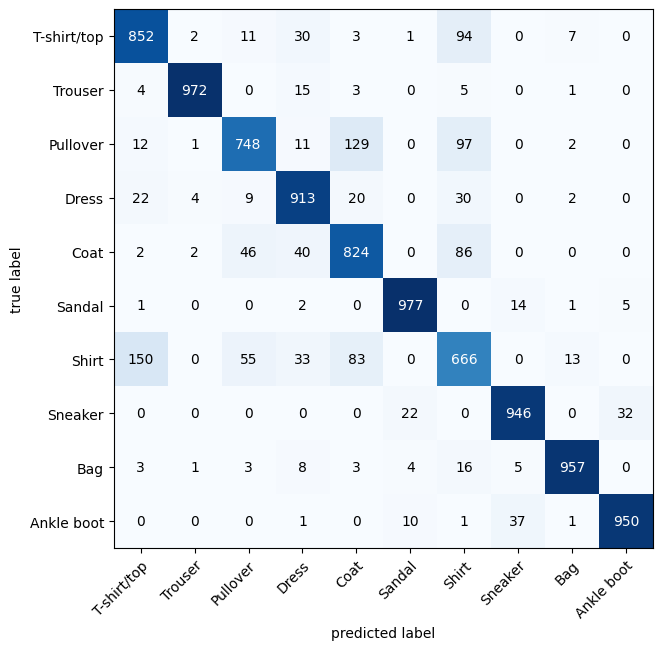

In [81]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

# 2. 设置混淆矩阵实例并将预测结果与真实标签进行比较
confmat = ConfusionMatrix(num_classes=len(class_names), task='multiclass')
confmat_tensor = confmat(preds=y_pred_tensor,
                         target=test_data.targets)

# 3. 绘制混淆矩阵
fig, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(),  # matplotlib 喜欢使用 NumPy 格式的数据
    class_names=class_names,  # 将行和列标签转换为类名
    figsize=(10, 7)
);

## 保存並載入性能最佳的模型

In [83]:
# 保存模型
from pathlib import Path

MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, # create parent directories if needed
                 exist_ok=True # if models directory already exists, don't error
)

MODEL_NAME = "CNN_model.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_2.state_dict(),f=MODEL_SAVE_PATH)

Saving model to: models/CNN_model.pth


In [85]:
# 重新載入模型，並丟給評估函數
loaded_model_2 = FashionMNISTModelV2(input_shape=1,
                                    hidden_units=10, # try changing this to 128 and seeing what happens
                                    output_shape=10)

loaded_model_2.load_state_dict(torch.load(f=MODEL_SAVE_PATH))
loaded_model_2 = loaded_model_2.to(device)


torch.manual_seed(CFG.SEED)
loaded_model_2_results = eval_model(
    model=loaded_model_2,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn
)

loaded_model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.32718968391418457,
 'model_acc': 88.06908945686901}

In [86]:
# 使用torch.isclose()做模型比較
torch.isclose(torch.tensor(model_2_results["model_loss"]),
              torch.tensor(loaded_model_2_results["model_loss"]),
              atol=1e-08, # absolute tolerance
              rtol=0.0001) # relative tolerance

tensor(True)